In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
#Код позволяет вычислить коэффициент корреляции и общее изменение % одной валюты от другой, в качестве данных используются статистические данные цен 

In [2]:
c = input('введите пару, в формате "символ токена-USD", пример(XRP-USD): ')
stock_1 = yf.Ticker(c) #XRP-USD
a = input('введите период, равный: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max ')
b = input('введите интервал, равный: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo ')
other_crypto_prices = stock_1.history(period=a, interval=b)
other_crypto_prices = other_crypto_prices.dropna()
other_crypto_prices_cl = other_crypto_prices[["Close"]]
other_crypto_prices_op = other_crypto_prices[["Open"]]
other_crypto_prices_hg = other_crypto_prices[["High"]]
other_crypto_prices_lw = other_crypto_prices[["Low"]]
print(other_crypto_prices_cl[["Close"]])



                              Close
Date                               
2023-08-09 00:00:00+00:00  0.643365
2023-08-10 00:00:00+00:00  0.632986
2023-08-11 00:00:00+00:00  0.631675
2023-08-12 00:00:00+00:00  0.627205
2023-08-13 00:00:00+00:00  0.626102
...                             ...
2023-11-05 00:00:00+00:00  0.661147
2023-11-06 00:00:00+00:00  0.715517
2023-11-07 00:00:00+00:00  0.686402
2023-11-08 00:00:00+00:00  0.688076
2023-11-09 00:00:00+00:00  0.685892

[93 rows x 1 columns]


In [3]:
stock_2 = yf.Ticker("BTC-USD") #BTC-USD
bitcoin_prices = stock_2.history(period=a, interval=b)
bitcoin_prices = bitcoin_prices.dropna()
bitcoin_prices_cl = bitcoin_prices[["Close"]]
bitcoin_prices_op = bitcoin_prices[["Open"]]
bitcoin_prices_hg = bitcoin_prices[["High"]]
bitcoin_prices_lw = bitcoin_prices[["Low"]]
print(bitcoin_prices_cl[["Close"]])

                                  Close
Date                                   
2023-08-09 00:00:00+00:00  29561.494141
2023-08-10 00:00:00+00:00  29429.591797
2023-08-11 00:00:00+00:00  29397.714844
2023-08-12 00:00:00+00:00  29415.964844
2023-08-13 00:00:00+00:00  29282.914062
...                                 ...
2023-11-05 00:00:00+00:00  35049.355469
2023-11-06 00:00:00+00:00  35037.371094
2023-11-07 00:00:00+00:00  35443.562500
2023-11-08 00:00:00+00:00  35655.277344
2023-11-09 00:00:00+00:00  36910.875000

[93 rows x 1 columns]


In [4]:
d = input('введите пару, в формате "символ токена-USD", пример(XRP-USD): ')
stock_3 = yf.Ticker(d) #XRP-USD
j = input('введите период, равный: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max ')
i = input('введите интервал, равный: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo ')
other_crypto_prices_1 = stock_3.history(period=j, interval=i)
other_crypto_prices_1 = other_crypto_prices_1.dropna()
other_crypto_prices_cl_1 = other_crypto_prices_1[["Close"]]
other_crypto_prices_op_1 = other_crypto_prices_1[["Open"]]
other_crypto_prices_hg_1 = other_crypto_prices_1[["High"]]
other_crypto_prices_lw_1 = other_crypto_prices_1[["Low"]]
print(other_crypto_prices_cl_1[["Close"]])

                              Close
Date                               
2023-08-09 00:00:00+00:00  1.552691
2023-08-10 00:00:00+00:00  1.577183
2023-08-11 00:00:00+00:00  1.585684
2023-08-12 00:00:00+00:00  1.550797
2023-08-13 00:00:00+00:00  1.539305
...                             ...
2023-11-05 00:00:00+00:00  1.542085
2023-11-06 00:00:00+00:00  1.570369
2023-11-07 00:00:00+00:00  1.512524
2023-11-08 00:00:00+00:00  1.530169
2023-11-09 00:00:00+00:00  1.556224

[93 rows x 1 columns]


In [5]:
# bitcoin_prices_cl.dropna()
# other_crypto_prices_cl.dropna()
# plt

In [6]:
# расчет коэффициента корреляции пирсона первый крипты от биткоина
correlation_op = bitcoin_prices_op.dropna().squeeze().corr(other_crypto_prices_op.dropna().squeeze())
correlation_cl = bitcoin_prices_cl.dropna().squeeze().corr(other_crypto_prices_cl.dropna().squeeze())
correlation_hg = bitcoin_prices_hg.dropna().squeeze().corr(other_crypto_prices_hg.dropna().squeeze())
correlation_lw = bitcoin_prices_lw.dropna().squeeze().corr(other_crypto_prices_lw.dropna().squeeze())

print('correlation coefficient between bitcoin and litecoin:', correlation_op)
print('correlation coefficient between bitcoin and litecoin:', correlation_cl)
print('correlation coefficient between bitcoin and litecoin:', correlation_hg)
print('correlation coefficient between bitcoin and litecoin:', correlation_lw)

a = (correlation_op + correlation_cl + correlation_hg + correlation_lw) / 4
print('middle corr: ', a)

def calculate_growth_rate(bitcoin_growth, correlation_coefficient):
    other_crypto_growth = correlation_coefficient * bitcoin_growth
    return other_crypto_growth

bitcoin_growth = 1  # Рост биткоина в процентах
correlation_coefficient = a  # Коэффициент корреляции

other_crypto_growth = calculate_growth_rate(bitcoin_growth, correlation_coefficient)
print(f"With Bitcoin growing by {bitcoin_growth}%, other crypto is expected to grow by about {other_crypto_growth}%.")

# расчет коэффициента корреляции пирсона второй крипты от биткоина
correlation_op_1 = bitcoin_prices_op.dropna().squeeze().corr(other_crypto_prices_op_1.dropna().squeeze())
correlation_cl_1 = bitcoin_prices_cl.dropna().squeeze().corr(other_crypto_prices_cl_1.dropna().squeeze())
correlation_hg_1 = bitcoin_prices_hg.dropna().squeeze().corr(other_crypto_prices_hg_1.dropna().squeeze())
correlation_lw_1 = bitcoin_prices_lw.dropna().squeeze().corr(other_crypto_prices_lw_1.dropna().squeeze())

print('correlation coefficient between bitcoin and litecoin:', correlation_op_1)
print('correlation coefficient between bitcoin and litecoin:', correlation_cl_1)
print('correlation coefficient between bitcoin and litecoin:', correlation_hg_1)
print('correlation coefficient between bitcoin and litecoin:', correlation_lw_1)

b = (correlation_op_1 + correlation_cl_1 + correlation_hg_1 + correlation_lw_1) / 4
print('middle corr: ', b)

def calculate_growth_rate(bitcoin_growth, correlation_coefficient_1):
    other_crypto_growth_1 = correlation_coefficient_1 * bitcoin_growth
    return other_crypto_growth_1

bitcoin_growth = 1  # Рост биткоина в процентах
correlation_coefficient_1 = b  # Коэффициент корреляции

other_crypto_growth_1 = calculate_growth_rate(bitcoin_growth, correlation_coefficient_1)
print(f"With Bitcoin growing by {bitcoin_growth}%, other crypto is expected to grow by about {other_crypto_growth_1}%.")

correlation coefficient between bitcoin and litecoin: 0.7333319920563667
correlation coefficient between bitcoin and litecoin: 0.7611544499545194
correlation coefficient between bitcoin and litecoin: 0.7388218892774471
correlation coefficient between bitcoin and litecoin: 0.7527754525457666
middle corr:  0.7465209459585249
With Bitcoin growing by 1%, other crypto is expected to grow by about 0.7465209459585249%.
correlation coefficient between bitcoin and litecoin: 0.3023959975553531
correlation coefficient between bitcoin and litecoin: 0.3340197221870559
correlation coefficient between bitcoin and litecoin: 0.3158089338787024
correlation coefficient between bitcoin and litecoin: 0.3014542172168589
middle corr:  0.31341971770949256
With Bitcoin growing by 1%, other crypto is expected to grow by about 0.31341971770949256%.


In [12]:
#Зависимость криптовалюты от криптовалюты
correlation_op_2 = other_crypto_prices_op.dropna().squeeze().corr(other_crypto_prices_op_1.dropna().squeeze())
correlation_cl_2 = other_crypto_prices_op.dropna().squeeze().corr(other_crypto_prices_cl_1.dropna().squeeze())
correlation_hg_2 = other_crypto_prices_op.dropna().squeeze().corr(other_crypto_prices_hg_1.dropna().squeeze())
correlation_lw_2 = other_crypto_prices_op.dropna().squeeze().corr(other_crypto_prices_lw_1.dropna().squeeze())

print('correlation coefficient between bitcoin and litecoin:', correlation_op_2)
print('correlation coefficient between bitcoin and litecoin:', correlation_cl_2)
print('correlation coefficient between bitcoin and litecoin:', correlation_hg_2)
print('correlation coefficient between bitcoin and litecoin:', correlation_lw_2)

g = (correlation_op_2 + correlation_cl_2 + correlation_hg_2 + correlation_lw_2) / 4
print('middle corr: ', g)

def calculate_growth_rate(other_crypto_growth, correlation_coefficient_2):
    other_crypto_growth_2 = correlation_coefficient_2 * other_crypto_growth
    return other_crypto_growth_2

other_crypto_growth = 1  # Рост другой крипты в процентах
correlation_coefficient_2 = g  # Коэффициент корреляции

other_crypto_growth_2_1 = calculate_growth_rate(other_crypto_growth, correlation_coefficient_2)
print(f"With Bitcoin growing by {other_crypto_growth}%, other crypto is expected to grow by about {other_crypto_growth_2_1}%.")

correlation coefficient between bitcoin and litecoin: 0.7029758994500538
correlation coefficient between bitcoin and litecoin: 0.6834607109918321
correlation coefficient between bitcoin and litecoin: 0.6988137365323768
correlation coefficient between bitcoin and litecoin: 0.6723932826029779
middle corr:  0.6894109073943102
With Bitcoin growing by 1%, other crypto is expected to grow by about 0.6894109073943102%.


In [20]:
print(f"При изменении биткоина на {bitcoin_growth}%, первая криптовалюта изменяется на {other_crypto_growth}%.")
print(f"При изменении биткоина на {bitcoin_growth}%, вторая криптовалюта изменяется на {other_crypto_growth_1}%.")
print(f"При изменении первой на {other_crypto_growth}%, вторая криптовалюта изменяется на {other_crypto_growth_2_1}%.")

При изменении биткоина на 1%, первая криптовалюта изменяется на 1%.
При изменении биткоина на 1%, вторая криптовалюта изменяется на 0.31341971770949256%.
При изменении первой на 1%, вторая криптовалюта изменяется на 0.6894109073943102%.


Text(0, 0.5, 'цена')

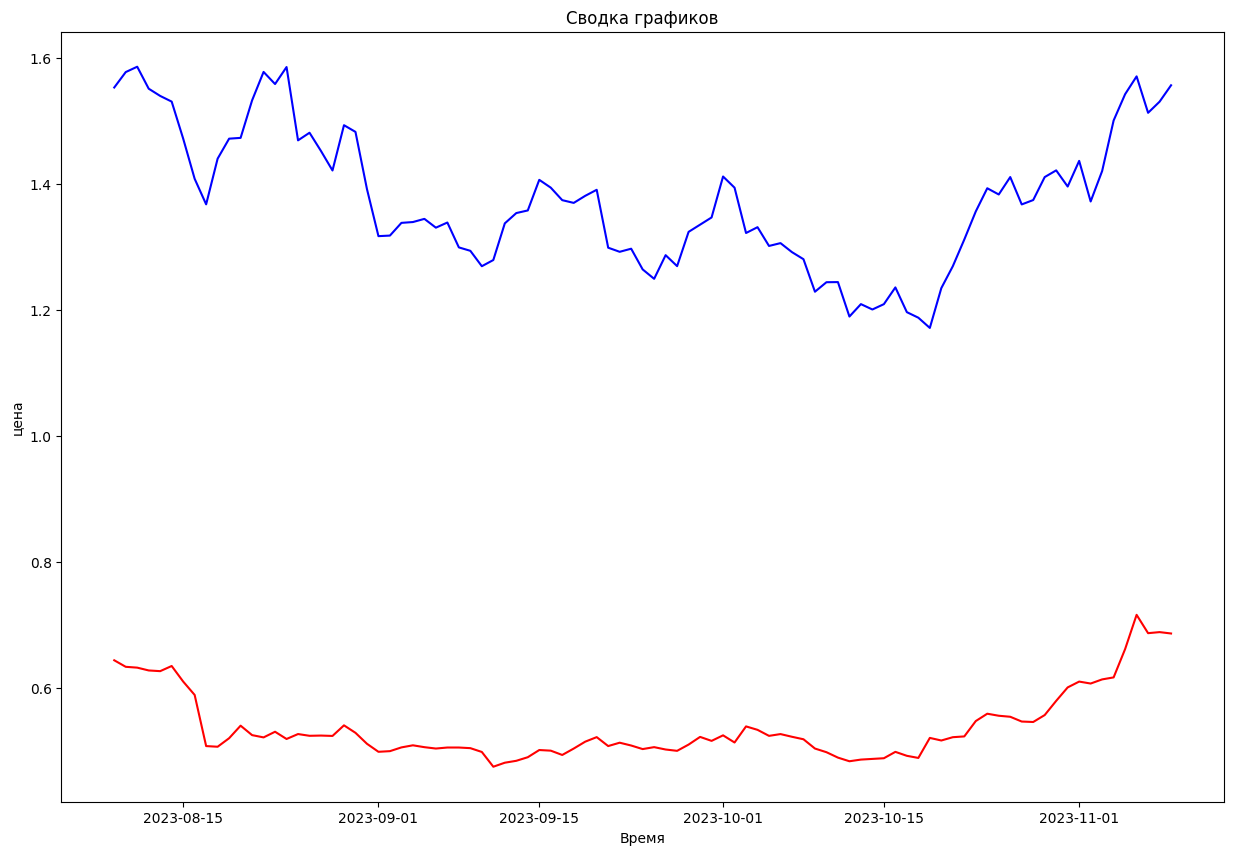

In [19]:
#только данные закрытий
plt.figure(figsize=(15,10))
plt.plot(other_crypto_prices_cl, color = 'red')

plt.plot(other_crypto_prices_cl_1, color='blue')

plt.title("Сводка графиков")
plt.xlabel("Время")
plt.ylabel("цена")


Text(0, 0.5, 'цена')

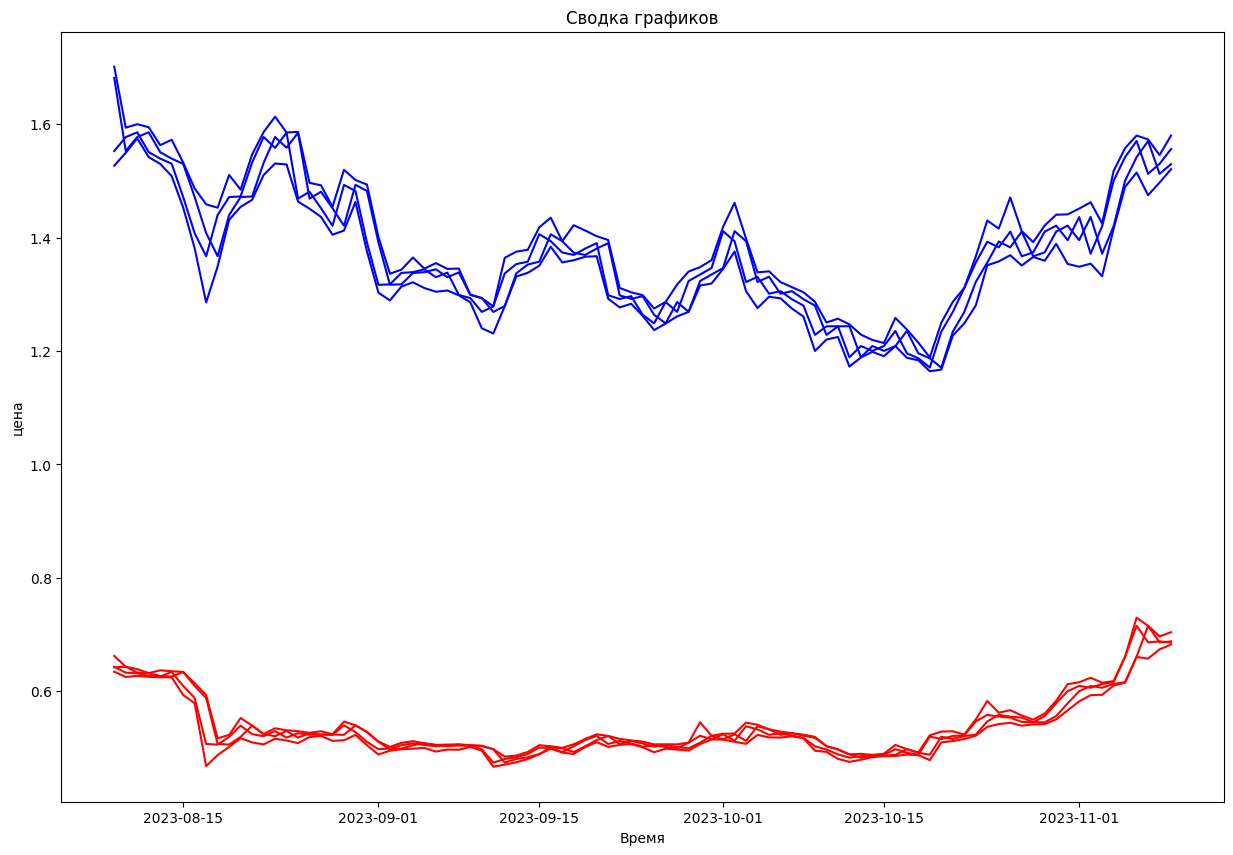

In [18]:
#Общие данные
plt.figure(figsize=(15,10))
plt.plot(other_crypto_prices_cl, color = 'red')
plt.plot(other_crypto_prices_op, color = 'red')
plt.plot(other_crypto_prices_lw, color = 'red')
plt.plot(other_crypto_prices_hg, color = 'red')
plt.plot(other_crypto_prices_cl_1, color='blue')
plt.plot(other_crypto_prices_op_1, color='blue')
plt.plot(other_crypto_prices_lw_1, color='blue')
plt.plot(other_crypto_prices_hg_1, color='blue')
plt.title("Сводка графиков")
plt.xlabel("Время")
plt.ylabel("цена")
# plt.legend("коэффициент корреляции")

In [8]:
# from scipy.stats import pearsonr

# bitcoin_data = bitcoin_prices_cl
# litecoin_data = other_crypto_prices_cl

# # Вычисление процентного изменения биткоина
# bitcoin_change = bitcoin_data.pct_change().dropna().squeeze()

# # Вычисление процентного изменения лайткоина
# litecoin_change = litecoin_data.pct_change().dropna().squeeze()

# # Проверяем размерность данных и приравниваем их длину
# min_length = min(len(bitcoin_change), len(litecoin_change))
# bitcoin_change = bitcoin_change[:min_length]
# litecoin_change = litecoin_change[:min_length]

# # Вычисление коэффициента корреляции между биткоином и лайткоином
# correlation, _ = pearsonr(bitcoin_change, litecoin_change)

# print(f"Коэффициент корреляции между биткоином и другой криптовалютой: {correlation}")